# Exploratory Data Analysis: Flight Delays (JFK)
In this notebook, we load the raw data from Airline_Delay_Cause.csv and perform initial data cleaning, filtering, and exploratory visualizations with an emphasis on JFK airport.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.dates as mdates

In [34]:
# load raw data from past 5 years from BTS
df = pd.read_csv("../data/raw/raw data/Jan-Dec2024_BTS/Airline_Delay_Cause5.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,12,MQ,Envoy Air,EVV,"Evansville, IN: Evansville Regional",61.0,9.0,1.52,1.08,...,0.0,5.84,0.0,0.0,732.0,47.0,90.0,19.0,0.0,576.0
1,2024,12,MQ,Envoy Air,EWR,"Newark, NJ: Newark Liberty International",107.0,42.0,6.01,5.89,...,0.0,4.94,0.0,0.0,2531.0,335.0,491.0,1251.0,0.0,454.0
2,2024,12,MQ,Envoy Air,EYW,"Key West, FL: Key West International",169.0,31.0,3.37,0.71,...,0.0,15.48,5.0,3.0,1596.0,143.0,52.0,468.0,0.0,933.0
3,2024,12,MQ,Envoy Air,FAR,"Fargo, ND: Hector International",171.0,35.0,4.64,2.12,...,0.0,12.92,2.0,0.0,2428.0,245.0,184.0,575.0,0.0,1424.0
4,2024,12,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",69.0,14.0,2.00,2.47,...,0.0,4.83,1.0,0.0,720.0,86.0,154.0,191.0,0.0,289.0


In [35]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138728 entries, 0 to 138727
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 138728 non-null  int64  
 1   month                138728 non-null  int64  
 2   carrier              138728 non-null  object 
 3   carrier_name         138728 non-null  object 
 4   airport              138728 non-null  object 
 5   airport_name         138728 non-null  object 
 6   arr_flights          138440 non-null  float64
 7   arr_del15            138202 non-null  float64
 8   carrier_ct           138440 non-null  float64
 9   weather_ct           138440 non-null  float64
 10  nas_ct               138440 non-null  float64
 11  security_ct          138440 non-null  float64
 12  late_aircraft_ct     138440 non-null  float64
 13  arr_cancelled        138440 non-null  float64
 14  arr_diverted         138440 non-null  float64
 15  arr_delay        

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [36]:
# filter to JFK airport
pd.set_option('display.max_rows', None)
df["airport"] = df["airport"].str.strip()
jfk_df = df[df["airport"] == "JFK"].reset_index(drop=True)

# save the filtered data to a clean directory
jfk_df.to_csv("../data/clean/JFK_Weather_Delay_Data5.csv", index=False)

#jfk_df

    year  month  weather_delay       date
0   2019      1         5625.0 2019-01-01
1   2019      2         7983.0 2019-02-01
2   2019      3         3223.0 2019-03-01
3   2019      4         8427.0 2019-04-01
4   2019      5         5922.0 2019-05-01
5   2019      6         6647.0 2019-06-01
6   2019      7        14321.0 2019-07-01
7   2019      8         9299.0 2019-08-01
8   2019      9         1320.0 2019-09-01
9   2019     10         2228.0 2019-10-01
10  2019     11         1046.0 2019-11-01
11  2019     12         5528.0 2019-12-01
12  2020      1         2684.0 2020-01-01
13  2020      2         1166.0 2020-02-01
14  2020      3          680.0 2020-03-01
15  2020      4          176.0 2020-04-01
16  2020      5          159.0 2020-05-01
17  2020      6          137.0 2020-06-01
18  2020      7         1221.0 2020-07-01
19  2020      8         1572.0 2020-08-01
20  2020      9          341.0 2020-09-01
21  2020     10          323.0 2020-10-01
22  2020     11          161.0 202

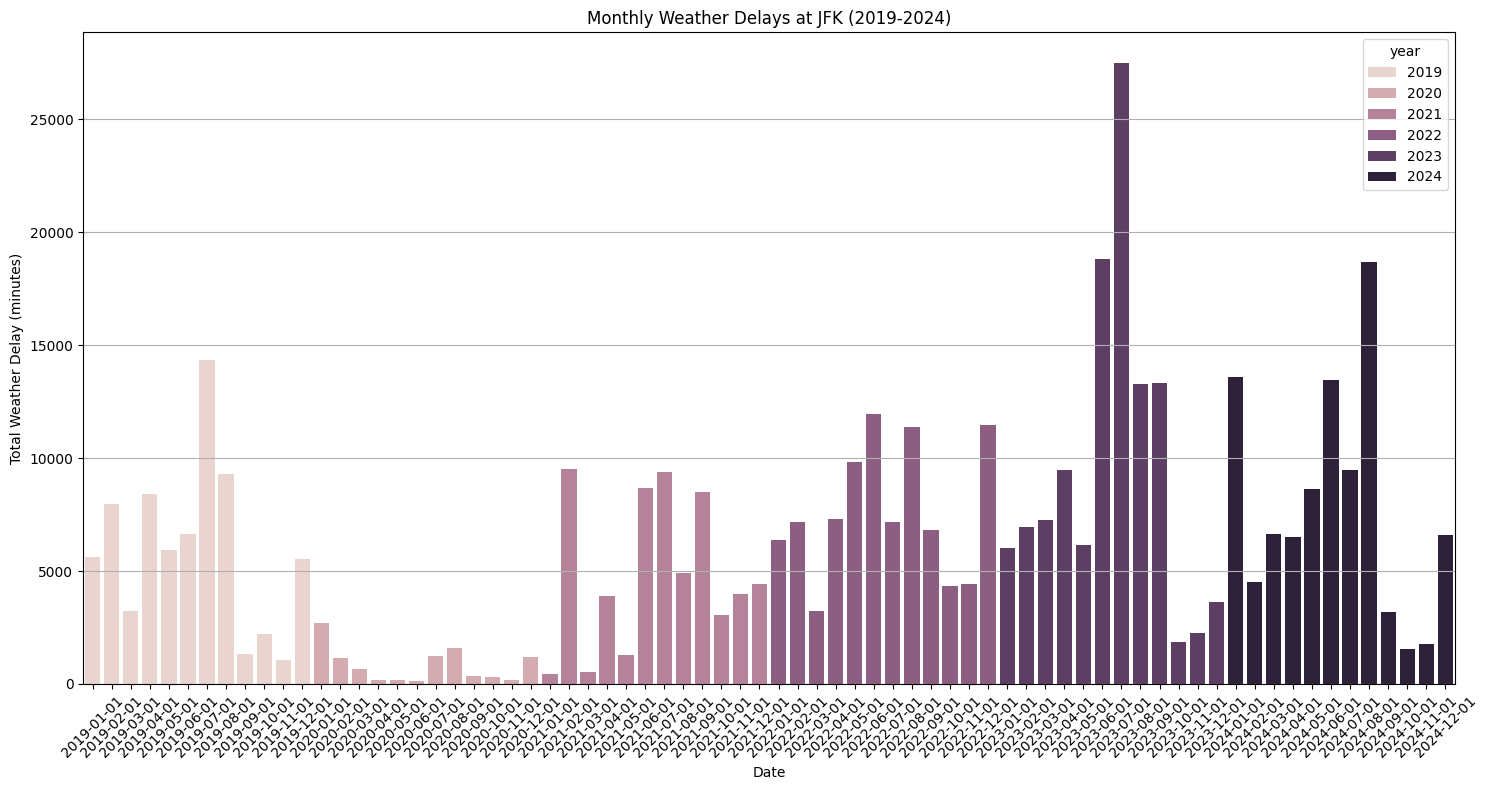

In [37]:
# histogram of monthly delays caused by weather
# group by year and month, summing weather_delay
monthly_weather = jfk_df.groupby(["year", "month"])["weather_delay"].sum().reset_index()

# create date column for x-axis
monthly_weather["date"] = pd.to_datetime(monthly_weather[["year", "month"]].assign(day=1))
print(monthly_weather)

# plot histogram
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_weather, x="date", y="weather_delay", hue="year", dodge=False)
plt.title("Monthly Weather Delays at JFK (2019-2024)")
plt.xlabel("Date")
plt.ylabel("Total Weather Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Jan: 32.81°F
Feb: 34.64°F
Mar: 41.26°F
Apr: 50.93°F
May: 60.48°F
Jun: 70.27°F
Jul: 76.33°F
Aug: 75.00°F
Sep: 68.43°F
Oct: 57.10°F
Nov: 46.90°F
Dec: 38.17°F


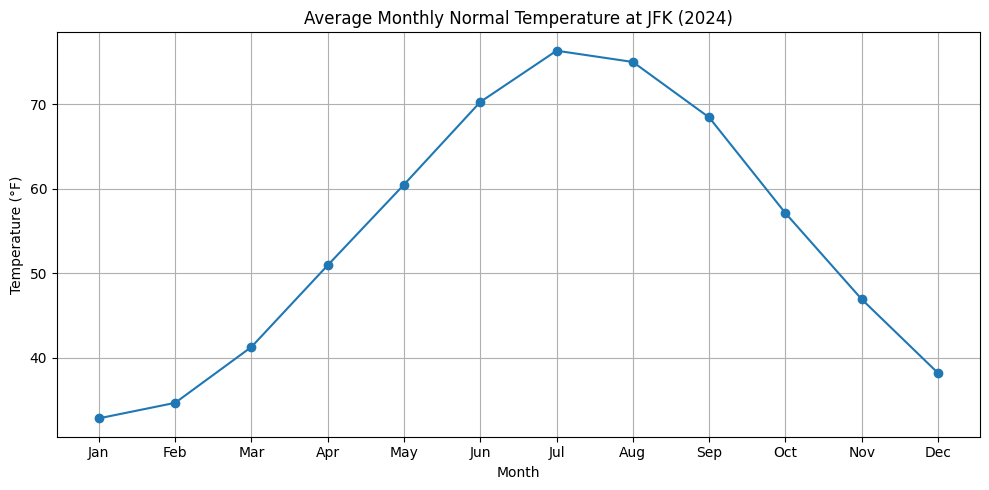

In [38]:
# average temperature across 12 months from csv files
# month files mapping and create month labels
temp_folder = "../data/raw/raw data/JFKWeatherData"

month_files = {
    "jfkjan.csv": "Jan", "jfkfeb.csv": "Feb", "jfkmar.csv": "Mar", "jfkapr.csv": "Apr",
    "jfkmay.csv": "May", "jfkjun.csv": "Jun", "jfkjul.csv": "Jul", "jfkaug.csv": "Aug",
    "jfksep.csv": "Sep", "jfkoct.csv": "Oct", "jfknov.csv": "Nov", "jfkdec.csv": "Dec"
}

monthly_avg_temps = []
month_labels = []

for filename, month in month_files.items():
    file_path = os.path.join(temp_folder, filename)
    
    try:
        # read the file without header, skip first 5 rows of actual metadata
        df = pd.read_csv(file_path, header=None, skiprows=5)
        
        # column index 3 = "Normal Mean T."  Calculate average temp of all days in month
        mean_temps = pd.to_numeric(df.iloc[:, 3], errors="coerce")
        monthly_avg = mean_temps.mean()
        
        monthly_avg_temps.append(monthly_avg)
        month_labels.append(month)

        # print the average temeprature for this month
        print(f"{month}: {monthly_avg:.2f}°F")
        
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        monthly_avg_temps.append(None)
        month_labels.append(month)

# plot the graph
plt.figure(figsize=(10, 5))
plt.plot(month_labels, monthly_avg_temps, marker='o')
plt.title("Average Monthly Normal Temperature at JFK (2024)")
plt.xlabel("Month")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.tight_layout()
plt.show()

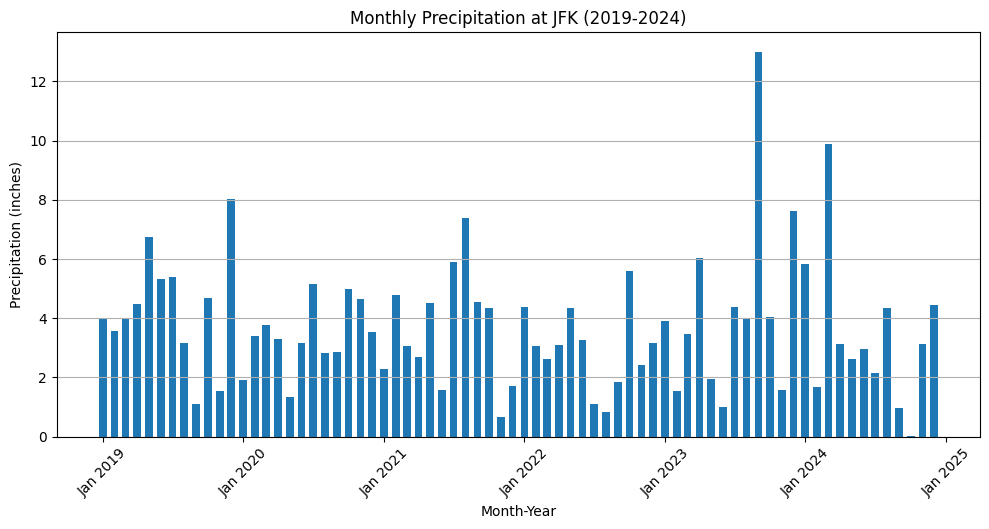

In [ ]:
# load the file for precipitation
precip_path = "../data/raw/raw data/JFKWeatherData/monthly_total_precipitation5.csv"

# read the file without header
df = pd.read_csv(precip_path, skiprows=1)
# strip all column names to remove hidden characters
df.columns = df.columns.str.strip()
# drop the summary rows at the bottom. only keep year column
df = df[pd.to_numeric(df["Year"], errors="coerce").notna()]
# drop annual col since we want monthly data
if "Annual" in df.columns:
    df = df.drop(columns=["Annual"])

# Convert 'Year' column to int
df["Year"] = df["Year"].astype(int)

# convert wide to long format
precip_long = df.melt(id_vars=["Year"], 
                             var_name="month", 
                             value_name="precipitation")

# create the month labels
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
precip_long["month"] = pd.Categorical(precip_long["month"], categories=months, ordered=True)

# create datetime col
month_num = precip_long["month"].cat.codes + 1
precip_long["date"] = pd.to_datetime(dict(year=precip_long["Year"], month=month_num, day=1))

print(precip_long[["Year", "month", "precipitation", "date"]].sort_values("date").to_string(index=False))

# plot the graph
plt.figure(figsize=(10, 5))
plt.bar(precip_long["date"], precip_long["precipitation"], width=20)
plt.title("Monthly Precipitation at JFK (2019-2024)")
plt.xlabel("Month-Year")
plt.ylabel("Precipitation (inches)")
plt.grid(axis='y')
plt.tight_layout()
# format x-axis as "Mon YYYY"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser" 

# load the storm data file from NOAA for Queens County (where JFK is located)
storm_path = "../data/raw/raw data/JFKWeatherData/storm_data_search_results5.csv"
# read the csv file
storm_df = pd.read_csv(storm_path)

# convert BEGIN_DATE to datetime
storm_df["BEGIN_DATE"] = pd.to_datetime(storm_df["BEGIN_DATE"], errors="coerce")
# extract the month number (1-12)
storm_df["year"] = storm_df["BEGIN_DATE"].dt.year
storm_df["month"] = storm_df["BEGIN_DATE"].dt.month

# filter relevant storm types, since events like rip current and coastal flood are irrelevant to flight delays
relevant_types = ["High Wind", "Thunderstorm Wind", "Flash Flood", "Winter Weather", "Strong Wind", "Heavy Snow", "Hail"]
storm_df = storm_df[storm_df["EVENT_TYPE"].isin(relevant_types)]

# create a formatted month label with month, year
storm_df["month_year"] = storm_df["BEGIN_DATE"].dt.strftime("%b %Y")
# count by month_year and event type
event_counts = storm_df.groupby(["month_year", "EVENT_TYPE"]).size().reset_index(name="count")

# sort month_year chronologically for x axis
event_counts["month_year"] = pd.to_datetime(event_counts["month_year"], format="%b %Y")
event_counts = event_counts.sort_values("month_year")
event_counts["month_year_str"] = event_counts["month_year"].dt.strftime("%b %Y")

print(event_counts[["month_year_str", "EVENT_TYPE", "count"]].to_string(index=False))

# create 3d scatter plot
fig = px.scatter_3d(
    event_counts,
    x="month_year_str",         # numerical month for axis ordering
    y="EVENT_TYPE",             # categorical event type
    z="count",                  # height = count of events
    color="EVENT_TYPE",         # color by event type
    size="count",               # bubble size = # events
    text="count",               # show value on hover
    labels={
        "month_year_str": "Month-Year",
        "EVENT_TYPE": "Event Type",
        "count": "Event Count"
    },
    title="Monthly Storm Events by Type in Queens (2019-2024)"
)
fig.show()
